# CSC-321: Data Mining and Machine Learning
# Irene Yin

## Assignment 4: Logistic Regression

### Part 1: Prediction

Everything so far has been a regression task - predicting a numeric value. We've moved on to talk about classification in class, so let's implement our first basic binary classifier. This is the same idea as linear regression, but we're going to predict one of two binary classes, using logistic regression.

The general outline for logistic regression is the same as for multivariate linear regression. We're going to need a function to make predictions, and a function to learn coefficients. 

(a) The formula for making a prediction, predY, for logistic regression is:

predY = 1.0 / 1.0 + e^-(b0 + b1 * x1 + ... + bN * xN)

Where b0 is the intercept or bias, bN is the coefficient for the input variable xN, and e is the base of the natural logarithms, or Euler's number. We can use the python math library which has an implementation of e called math.exp(x): https://docs.python.org/3/library/math.html

The formula given above is an implementation of a sigmoid function (a commonly used, s-shaped function that can take any input value and produce a number between 0 and 1).

We will assume there can be multiple input features (x1, x2 etc) not just a single value, and that each input feature will have a corresponding coefficient (b1, b2 etc).

Write your predict function, that will take a single instance, and a list of coefficients, and return a prediction. In the list of coefficients, assume coefficient[0] corresponds to b0. This will be very similar to your predict function from last week.

    

In [ ]:
# Write your predict function here
import math
def pred(instance, coefficient):
  #return: a prediction
  exponent = coefficient[0]
  for i in range(len(coefficient)-1):
    exponent += coefficient[i+1]*instance[i]
  predY = 1.0/(1.0 + math.exp(-exponent))
  return predY


We can test your predict function on the contrived dataset below. It includes TWO input features (we shall call x1 and x2) and a class feature (y) for each instance. The class is either 0 or 1.

(b) Graph the instances in this data, x1 (on the x axis) against x2 (on the y axis), using different colored points for the two classes. You may choose the colors. Use axes ranges of 0-10 on the x, and -1 to 6 on the y.

(c) Call your predict function on each instance in the contrived data set, using the coefficients given below. Get the predicted class from your function, and print (for each instance), the expected class, the predicted value AND the predicted class. In order to get the predicted class from the value predicted, we need to do rounding. There is a round() function that can help you. If it works correctly, you should predict the correct class of each instance in the dataset.

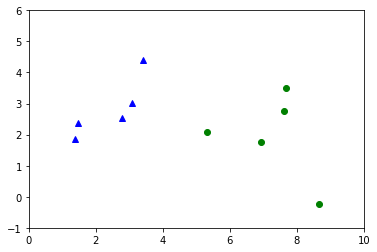

expected class:  0 predicted value:  0.2987569855650975 predicted class:  0
expected class:  0 predicted value:  0.14595105593031163 predicted class:  0
expected class:  0 predicted value:  0.08533326519733725 predicted class:  0
expected class:  0 predicted value:  0.21973731424800344 predicted class:  0
expected class:  0 predicted value:  0.24705900008926596 predicted class:  0
expected class:  1 predicted value:  0.9547021347460022 predicted class:  1
expected class:  1 predicted value:  0.8620341905282771 predicted class:  1
expected class:  1 predicted value:  0.9717729050420985 predicted class:  1
expected class:  1 predicted value:  0.9992954520878627 predicted class:  1
expected class:  1 predicted value:  0.9054893228110497 predicted class:  1


In [ ]:
# Here's the contrived data set
%matplotlib inline
import matplotlib.pyplot as plt

dataset = [[2.7810836,2.550537003,0],
    [1.465489372,2.362125076,0],
    [3.396561688,4.400293529,0],
    [1.38807019,1.850220317,0],
    [3.06407232,3.005305973,0],
    [7.627531214,2.759262235,1],
    [5.332441248,2.088626775,1],
    [6.922596716,1.77106367,1],
    [8.675418651,-0.242068655,1],
    [7.673756466,3.508563011,1]]

# Do the graphing here
dataX0 = []
dataX1 = []
dataY0 = []
dataY1 = []
for i in dataset:
    if i[2] == 0:
        dataX0.append(i[0])
        dataY0.append(i[1])
    else:
        dataX1.append(i[0])
        dataY1.append(i[1])

plt.plot(dataX0, dataY0,'b^', label = '0 class')
plt.plot(dataX1, dataY1,'go', label = '1 class')
plt.axis([0,10,-1,6])
plt.show()


# Call your predict function on the data here, using the following coefficients


coef = [-0.406605464, 0.852573316, -1.104746259]
predValue = [pred(i,coef) for i in dataset]


for index in range(len(predValue)):
  print("expected class: ", dataset[index][2], "predicted value: ", predValue[index], 
        "predicted class: ", round(predValue[index]))

# Go through each instance of X_train, and get a predicted y value
# Print out the predicted y, and the corresponding actual y from y_train



### Part 2: Learning coefficients

(d) Above I gave you coefficients. Just as with MLR, we need to estimate the coefficients for a data set. To do that, we're going to use stochastic gradient descent. The algorithm is exactly the same as for multivariate linear regression except for the following two things.

b0 is computed by:

b0 = b0 + learning_rate * error * predictedY * (1.0 - predictedY)

and bN is computed by:

bN = bN + learning_rate * error * predictedY * (1.0 - predictedY) * xN

for all coefficients b1..bN

To **calculate the error**, we run the algorithm with default coefficients and perform prediction, then get the error by subtracting the **predictedY** from the **actual Y value**. This is the opposite way around to last week. I'm just keeping you on your toes (actually, I've reversed the gradient. You're welcome).

Refer back to Assignment 3 for the complete algorithm

(e) Apply your coefficient learning function to the contrived dataset given above, using the learning rate of 0.3, and 100 epochs. Print the resulting coefficients. I've shown the last 5 epochs of my code over this example, so you can check your code. YOUR OUTPUT SHOULD BE THE SAME VALUES.


In [ ]:
# Write your function sgd_log(X_train, y_train, learning_rate, epochs) here

def sgd_log(X_train, y_train, learning_rate, epochs):
  # return the coefficients.
  coefficient = [0.0 for j in range(len(X_train[0])+1)]
  for iteration in range(epochs):
    Totalerror = 0
    for i in range(len(X_train)):
      preditedY = pred(X_train[i],coefficient)
      error = y_train[i] - preditedY
      Totalerror += error**2
      coefficient[0] += learning_rate * error * preditedY*(1.0-preditedY)
      for index in range(len(coefficient)-1):
        coefficient[index+1] += learning_rate * error *preditedY*(1.0-preditedY)* X_train[i][index]
    print(">epoch=", iteration, "lrate=", learning_rate,
          "error=%.3f" %Totalerror)
  return coefficient



# Call your function using the parameters given here. 
learning_rate = 0.3
epochs = 100
X_train = []
y_train = []
for i in range(len(dataset)):
  X_train.append(dataset[i][:len(dataset[i])-1])

for i in range(len(dataset)):
  y_train.append(dataset[i][-1])

coefficient = sgd_log(X_train, y_train, learning_rate, epochs)
print("the coefficient is: ", coefficient)



# Example output
#
#>epoch=95, lrate=0.300, error=0.023
#>epoch=96, lrate=0.300, error=0.023
#>epoch=97, lrate=0.300, error=0.023
#>epoch=98, lrate=0.300, error=0.023
#>epoch=99, lrate=0.300, error=0.022


>epoch= 0 lrate= 0.3 error=2.217
>epoch= 1 lrate= 0.3 error=1.613
>epoch= 2 lrate= 0.3 error=1.113
>epoch= 3 lrate= 0.3 error=0.827
>epoch= 4 lrate= 0.3 error=0.623
>epoch= 5 lrate= 0.3 error=0.494
>epoch= 6 lrate= 0.3 error=0.412
>epoch= 7 lrate= 0.3 error=0.354
>epoch= 8 lrate= 0.3 error=0.310
>epoch= 9 lrate= 0.3 error=0.276
>epoch= 10 lrate= 0.3 error=0.248
>epoch= 11 lrate= 0.3 error=0.224
>epoch= 12 lrate= 0.3 error=0.205
>epoch= 13 lrate= 0.3 error=0.189
>epoch= 14 lrate= 0.3 error=0.174
>epoch= 15 lrate= 0.3 error=0.162
>epoch= 16 lrate= 0.3 error=0.151
>epoch= 17 lrate= 0.3 error=0.142
>epoch= 18 lrate= 0.3 error=0.134
>epoch= 19 lrate= 0.3 error=0.126
>epoch= 20 lrate= 0.3 error=0.119
>epoch= 21 lrate= 0.3 error=0.113
>epoch= 22 lrate= 0.3 error=0.108
>epoch= 23 lrate= 0.3 error=0.103
>epoch= 24 lrate= 0.3 error=0.098
>epoch= 25 lrate= 0.3 error=0.094
>epoch= 26 lrate= 0.3 error=0.090
>epoch= 27 lrate= 0.3 error=0.087
>epoch= 28 lrate= 0.3 error=0.084
>epoch= 29 lrate= 0.3 er

### Part 3: Classification algorithms

(f) Now you have sufficient functionality to write a function to make predictions using logistic regression. Create a function with the signature log_reg(X_train, y_train, X_test, learning_rate, epochs). 

We're going to use the same dataset here for both training and testing, even though we know that might not be a great idea.

Here's the log_reg algorithm. We're going to estimate our coefficients from the training data, using the function from (d) above, and we'll print them out. We're going to create a new list, to hold our predictions. Then for each entry in the testing data, we're going to read the input value, and make a prediction, using our function from (a). For each entry in the test data, we're going to append our predicted y class to the prediction list. In order to predict the class correctly, we need to round our score, as above, before appending it. We're going to return our list of predictions.

In [ ]:
# Write your function log_reg(X_train, y_train, X_test, learning_rate, epochs) here
def log_reg(X_train, y_train, X_test, learning_rate, epochs):
  # return prediction
  coefficient = sgd_log(X_train, y_train, learning_rate, epochs)
  print("Coefficient is: ", coefficient)
  predictions = []
  for i in range(len(X_test)):
    predictY = pred(X_test[i],coefficient)
    predictions.append(round(predictY))
  return predictions
X_test = X_train
epochs1 = 10
print(log_reg(X_train, y_train, X_test, learning_rate, epochs))

>epoch= 0 lrate= 0.3 error=2.217
>epoch= 1 lrate= 0.3 error=1.613
>epoch= 2 lrate= 0.3 error=1.113
>epoch= 3 lrate= 0.3 error=0.827
>epoch= 4 lrate= 0.3 error=0.623
>epoch= 5 lrate= 0.3 error=0.494
>epoch= 6 lrate= 0.3 error=0.412
>epoch= 7 lrate= 0.3 error=0.354
>epoch= 8 lrate= 0.3 error=0.310
>epoch= 9 lrate= 0.3 error=0.276
>epoch= 10 lrate= 0.3 error=0.248
>epoch= 11 lrate= 0.3 error=0.224
>epoch= 12 lrate= 0.3 error=0.205
>epoch= 13 lrate= 0.3 error=0.189
>epoch= 14 lrate= 0.3 error=0.174
>epoch= 15 lrate= 0.3 error=0.162
>epoch= 16 lrate= 0.3 error=0.151
>epoch= 17 lrate= 0.3 error=0.142
>epoch= 18 lrate= 0.3 error=0.134
>epoch= 19 lrate= 0.3 error=0.126
>epoch= 20 lrate= 0.3 error=0.119
>epoch= 21 lrate= 0.3 error=0.113
>epoch= 22 lrate= 0.3 error=0.108
>epoch= 23 lrate= 0.3 error=0.103
>epoch= 24 lrate= 0.3 error=0.098
>epoch= 25 lrate= 0.3 error=0.094
>epoch= 26 lrate= 0.3 error=0.090
>epoch= 27 lrate= 0.3 error=0.087
>epoch= 28 lrate= 0.3 error=0.084
>epoch= 29 lrate= 0.3 er



(g) Now we need a function for calculating accuracy. We need to keep count of how many predictions are correct. It will take a list of actual class values, and a list of predicted class values. If the actual value of an instance and the predicted value of an instance are the same, increment a counter. In the end, return the value of this counter divided by the length of the actual values list. Call this function accuracy.

(h) We also need a baseline function. Create a function called zeroRC(train, test). This function should take the training data, and find the most common value of Y in the training data. It should then return a list of predictions the same length as the test data, containing ONLY this value that was most common. It works very similarly to the zeroR function you've been using for linear regression.

(i) Apply logistic regression and zeroRC to the sample dataset. Use a learning rate of 0.3 and 100 epochs for logistic regression. Calculate accuracy for both algorithms, and print the results as a percentage accuracy. Give me a write up on the experiment below - which algorithm is better?

(j) See how the error rate for the SGD learned coefficients goes down? Write in the text box the error rate at iteration 100, and the error rate at iteration 10. Run the code with just 10 epochs. Does the accuracy of the overall classifier change? 


In [ ]:
# Do all the code here
#g)
def accuracy(actual_value, predicted_value):
  # return how many times the function predicts correctly in ratio.
  counter = 0 
  for i in range(len(actual_value)):
    if actual_value[i] == predicted_value[i]:
      counter += 1
  return counter/len(actual_value)
#h)
def zeroRC(train, test):
  # return baseline
  commonElement = max(set(train), key = train.count)
  return [commonElement for i in range(len(test))]
#i)
X_test = X_train
logReg_prediction = log_reg(X_train, y_train,X_test,learning_rate,epochs)
zeroRC_prediction = zeroRC(y_train, X_test)
accuracy_logReg = accuracy(y_train, logReg_prediction) * 100
accuracy_zeroRC = accuracy(y_train, zeroRC_prediction) * 100
print("Logistic Regression prediction accuracy = ", accuracy_logReg)
print("ZeroR prediction accuracy = ", accuracy_zeroRC)

#j)
epochs1 = 10
print(sgd_log(X_train,y_train, learning_rate, epochs))
print(sgd_log(X_train, y_train, learning_rate,epochs1))

predic1 = log_reg(X_train,y_train,X_test,learning_rate,epochs)
predic2 = log_reg(X_train,y_train,X_test,learning_rate,epochs1)
accuracy1 = accuracy(y_train, predic1)
accuracy2 = accuracy(y_train, predic2)
print("The accuracy for iteration 100 = ", accuracy1*100)
print("The accuracy for iteration 10 = ", accuracy2*100)




>epoch= 0 lrate= 0.3 error=2.217
>epoch= 1 lrate= 0.3 error=1.613
>epoch= 2 lrate= 0.3 error=1.113
>epoch= 3 lrate= 0.3 error=0.827
>epoch= 4 lrate= 0.3 error=0.623
>epoch= 5 lrate= 0.3 error=0.494
>epoch= 6 lrate= 0.3 error=0.412
>epoch= 7 lrate= 0.3 error=0.354
>epoch= 8 lrate= 0.3 error=0.310
>epoch= 9 lrate= 0.3 error=0.276
>epoch= 10 lrate= 0.3 error=0.248
>epoch= 11 lrate= 0.3 error=0.224
>epoch= 12 lrate= 0.3 error=0.205
>epoch= 13 lrate= 0.3 error=0.189
>epoch= 14 lrate= 0.3 error=0.174
>epoch= 15 lrate= 0.3 error=0.162
>epoch= 16 lrate= 0.3 error=0.151
>epoch= 17 lrate= 0.3 error=0.142
>epoch= 18 lrate= 0.3 error=0.134
>epoch= 19 lrate= 0.3 error=0.126
>epoch= 20 lrate= 0.3 error=0.119
>epoch= 21 lrate= 0.3 error=0.113
>epoch= 22 lrate= 0.3 error=0.108
>epoch= 23 lrate= 0.3 error=0.103
>epoch= 24 lrate= 0.3 error=0.098
>epoch= 25 lrate= 0.3 error=0.094
>epoch= 26 lrate= 0.3 error=0.090
>epoch= 27 lrate= 0.3 error=0.087
>epoch= 28 lrate= 0.3 error=0.084
>epoch= 29 lrate= 0.3 er

After comparing the prediction accuracy of logistic regression and ZeroR, we have that Logistic Regression is better since zeroR only have 50% accuracy while logistic regression has 100% accuracy in this case.


The error rate of GSD for iteration 100 is 0.022, and the error rate of GSD for iteration 10 is 0.276. However, the accuracy for this two iteration are the same which is 100%. The overall accuracy didn't change.

### Part 4: Introduction to scikit-learn

One of the most popular open-source python machine learning libraries is scikit-learn. You can find out more in general at: https://scikit-learn.org/stable/index.html

This time, I'm only doing the bare minimum. I'll load the relevant models from scikit-learn, but it's up to you to train and test them, and report the scores appropriately. I also want you to generate a confusion matrix.

Do the following:
- Train the SGD Classifier, using the fit method (note: I'm using the 'log' loss parameter, which means it will behave as logistic regression. There are other options).
  - Print out information about the model, including the coefficients, the intercept and the number of iterations it took to train
  - Compare these coefficients to the ones you learned. They WILL be different
  - Use the model to predict values for X_test
- Evaluate performance using the imported accuracy_metric
- Plot the confusion matrix using the imported plot_confusion_matrix
- Train and test the standard logistic regression model from sklearn 
- Train and test the dummy classifier (zeroR)
- Print out the ACCURACY for all three
- Add a text box AFTER the results commenting on which model(s) are better, and comparing the coefficients your code learned, to those of the SGD Classifier you used here.

Important links:
- [SGD Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
- [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [Dummy Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
-[accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
-[plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html)




INTERCEPT: (B0) [-14.91048761]
COEFFS: (B1...BN) [[ 35.34316324 -39.97356502]]
ITERATIONS TAKEN: 7


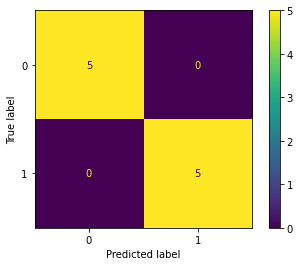

SGD accuracy Score =  1.0  Logistic Regression accuracy Score =  1.0  zeroR accuracy score =  0.5


In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Use this dataset for all examples

dataset = [[2.7810836,2.550537003,0],
    [1.465489372,2.362125076,0],
    [3.396561688,4.400293529,0],
    [1.38807019,1.850220317,0],
    [3.06407232,3.005305973,0],
    [7.627531214,2.759262235,1],
    [5.332441248,2.088626775,1],
    [6.922596716,1.77106367,1],
    [8.675418651,-0.242068655,1],
    [7.673756466,3.508563011,1]]

# **************************************************************************
# CREATE YOUR X_train,y_train, X_Test,y_test datasets here

#
X_train = []
y_train = []
for i in range(len(dataset)):
  X_train.append(dataset[i][:len(dataset[i])-1])

for i in range(len(dataset)):
  y_train.append(dataset[i][-1])

X_test = X_train
y_test = y_train

# **************************************************************************
#sgd
sgd_clf = SGDClassifier(loss='log',max_iter=50)
sgd = sgd_clf.fit(X_train, y_train)
print('INTERCEPT: (B0)',sgd.intercept_)
print('COEFFS: (B1...BN)',sgd.coef_)         
print('ITERATIONS TAKEN:',sgd.n_iter_)
sgd_predY = sgd.predict(X_test)
sgd_score = accuracy_score(y_train, sgd_predY) 

plot_confusion_matrix(sgd, X_test, y_test) 
plt.show()

# Logistic Regression
lr_clf = LogisticRegression()
lr = lr_clf.fit(X_train,y_train)
lr_predY = lr.predict(X_test)
lr_score = accuracy_score(y_train, lr_predY)

# zeroR
zr_clf = DummyClassifier(strategy="most_frequent")
zeroR = zr_clf.fit(X_train, y_train)
zeroR_predY = zeroR.predict(X_test)
zeroR_score = accuracy_score(y_train, zeroR_predY)

print("SGD accuracy Score = ", sgd_score, " Logistic Regression accuracy Score = ", lr_score, 
      " zeroR accuracy score = ", zeroR_score)




After comparing the score of each classifier, SGD and Logistic Regression are the relatively better because they all get score 1. But the zeroR got score 0.5, which is lower than the other two.

The coefficient my code learned and the coefficient of SGD classifier learned here are compeletly different. They are not closed at all. There is also a great difference in terms of the magnitude. They have different dimentions. The coefficient my code learned is one dimention while the SGD classifier is two dimention.